In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # This is the missing import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
import numpy as np
from imblearn.over_sampling import SMOTE
log = LogisticRegression()

In [3]:
data = pd.read_csv("donateacry-corpus_features_final.csv")
df = pd.DataFrame(data)

# Drop the first column (column 'A')
df = df.iloc[:, 1:]
df

,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,...,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,...,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,...,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,...,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,...,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,4,0.036321,0.012994,0.042826,0.460018,613.970520,291.439865,19.730806,-45.207684,0.021832,...,-4.639066,0.584061,-10.853903,3.248470,6.053586,-5.002748,-0.769779,0.259279,-4.109865,-0.197854
453,4,0.006673,0.002049,0.105679,0.021918,1195.248678,438.517237,25.978298,-55.034866,-0.080119,...,-0.379960,12.435725,-7.656326,-5.199711,2.705278,-2.540238,-0.782420,0.764154,-2.904532,0.247652
454,4,0.004490,0.001858,0.115782,0.003234,1447.092259,736.852973,28.304186,-58.661260,0.083645,...,-15.367967,6.072005,-23.269968,-11.039415,3.739090,-9.503819,-7.832272,-6.361354,-13.773407,-6.661149
455,4,0.090113,0.032940,0.105524,0.946393,1305.720324,592.416192,26.528082,-40.918472,-0.023269,...,-14.185391,1.068526,-40.488503,-8.189845,-1.425352,-26.041030,-0.625539,7.053206,-12.801304,-3.918470


In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,:1]

c:\Users\nikhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=0, n=382 (20.000%)
Class=1, n=382 (20.000%)
Class=2, n=382 (20.000%)
Class=3, n=382 (20.000%)
Class=4, n=382 (20.000%)


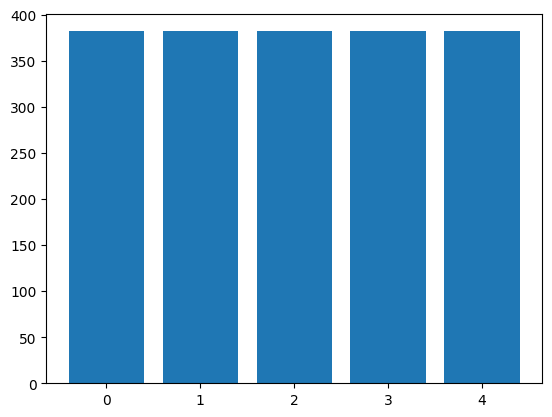

In [5]:
y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [6]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

# 1. SVM

In [9]:
from sklearn.svm import SVC  # Import the Support Vector Classifier

# Create the Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear', C=1)  # You can adjust the kernel and C parameter as needed

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       135
           1       0.85      1.00      0.92       134
           2       0.71      0.73      0.72       151
           3       0.42      0.31      0.35       121
           4       0.75      0.59      0.66       128

    accuracy                           0.72       669
   macro avg       0.70      0.71      0.70       669
weighted avg       0.70      0.72      0.70       669

Confusion Matrix:
[[125   0   2   5   3]
 [  0 134   0   0   0]
 [ 13   2 110  21   5]
 [ 20  21  25  37  18]
 [  8   0  19  25  76]]


# 2 . Random Forest

In [8]:
# Adding random forest algo 
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       135
           1       0.96      1.00      0.98       134
           2       0.98      0.93      0.95       151
           3       0.90      0.82      0.86       121
           4       0.86      0.96      0.91       128

    accuracy                           0.93       669
   macro avg       0.93      0.93      0.93       669
weighted avg       0.94      0.93      0.93       669

Confusion Matrix:
[[129   0   0   0   6]
 [  0 134   0   0   0]
 [  0   0 140   6   5]
 [  5   5   3  99   9]
 [  0   0   0   5 123]]
